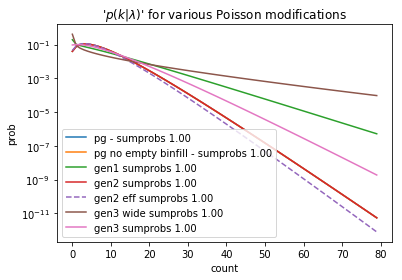

In [2]:
import llh_defs.poisson as poisson
import numpy
import scipy.special
import pylab
import llh_defs.multinomial as multinomial

log_stirling=poisson.generate_log_stirling(max_val=300)

## MC events in a single bin
weights_bin1_ds1=numpy.array([1.0,0.2,2.8]) ## three MC events from dataset 1
weights_bin1_ds2=numpy.array([2.0]) ## one MC event from dataset 2
weights_bin1_ds3=numpy.array([]) ## the bin is empty from dataset 3

k_list=numpy.array([2])

## Every datset contains a list of arrays ,every array representing a bin. In this example there is only one array
## since there is only one bin. The third dataset has no events and the array is an empty numpy array.
weights_dict=dict()
weights_dict["sig"]=[weights_bin1_ds1]
weights_dict["bg"]=[weights_bin1_ds2]
weights_dict["third"]=[weights_bin1_ds3]

counts=numpy.arange(80)

yvals_standard_pg=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict)) for i in counts]
yvals_standard_pg_nobin_filling=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, empty_bin_strategy=0)) for i in counts]
yvals_gen1=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen1")) for i in counts]
yvals_gen2=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen2")) for i in counts]
yvals_gen2_effective=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen2_effective")) for i in counts]
yvals_gen3_wide=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen3", s_factor=10, log_stirling=log_stirling)) for i in counts]
yvals_gen3=[numpy.exp(poisson.generic_pdf(numpy.array([i]), weights_dict, type="gen3", log_stirling=log_stirling)) for i in counts]

ax=pylab.gca()


pylab.plot(counts, yvals_standard_pg, label="pg - sumprobs %.2f" % sum(yvals_standard_pg))
pylab.plot(counts, yvals_standard_pg_nobin_filling, label="pg no empty binfill - sumprobs %.2f" % sum(yvals_standard_pg))
pylab.plot(counts, yvals_gen1, label="gen1 sumprobs %.2f" % sum(yvals_gen1))
pylab.plot(counts, yvals_gen2, label="gen2 sumprobs %.2f" % sum(yvals_gen2))
pylab.plot(counts, yvals_gen2_effective, label="gen2 eff sumprobs %.2f" % sum(yvals_gen2_effective), ls="--")
pylab.plot(counts, yvals_gen3_wide, label="gen3 wide sumprobs %.2f" % sum(yvals_gen3_wide))
pylab.plot(counts, yvals_gen3, label="gen3 sumprobs %.2f" % sum(yvals_gen3))
pylab.legend()
pylab.semilogy()
ax.set_xlabel("count")
ax.set_ylabel("prob")
ax.set_title(r"'$p(k|\lambda)$' for various Poisson modifications")
pylab.show()
